In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc
from matplotlib.tri import Triangulation
from sklearn.linear_model import LinearRegression

In [2]:
import scipy as scp

In [3]:
a0_sizes = [0.551,0.465,0.475,0.755,0.548,0.505,0.498,0.551]#[0.416,0.551,0.465,0.475,0.755,0.548,0.505,0.498,0.551]#
dt_list = 1e-2#[9e-3,1e-2,1e-2,6e-3,9e-3,9e-3,1e-2,9e-3]#[6e-3,9e-3,1e-2,1e-2,6e-3,9e-3,9e-3,1e-2,9e-3]#

In [4]:
1/np.mean(dt_list)

100.0

In [5]:
wound_sizes = ['0.46','0.401','0.42','0.383','0.415','0.342','0.485','0.405']#['0.387', '0.46','0.401','0.42','0.383','0.415','0.342','0.485','0.405']#
tissues_list = [2,3,4,5,6,7,8,9]#[1,2,3,4,5,6,7,8,9]#
LW1_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25]
#[0.0, 0.2, 0.4, 0.6, 0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.4, 2.8, 3.2, 3.6, 4.0]
L1_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25]
#[20, 21, 22, 23, 24, 25, 26, 27,28,29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,45,46, 47,48,49,50,51,52,53,54,55]

a1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
p1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
t_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
t1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
opt_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))

for tissue in range(len(tissues_list)):
    p1_list = []
    a1_list = []
    t_list = []
    t1_list = []
    opt_list = []
    for lr in L1_list:
        for lw in LW1_list:
            opt_ = []
            with open('tissue225_2/tissue'+str(tissues_list[tissue])+'/woundinfoA'+wound_sizes[tissue]+'G1L-'+str(lr)+'Lw-'+str(lw)+'Ncells225.txt','r') as text:
                for line in text:
                    opt_.append(float(line.replace("\n","").split(' ')[2]))
                    pass
                
                last_line = (line.replace("\n","")).split(' ')
                opt_list.append([lr,lw,np.argmax(opt_)/float(last_line[0])])
                #print(last_line)
                t_list.append([lr,lw,float(last_line[0])*float(wound_sizes[tissue])])
                t1_list.append([lr,lw,float(last_line[1])])
                p1_list.append([lr,lw,float(last_line[2])])
                a1_list.append([lr,lw,float(last_line[3])])
                

    a1_array = np.array(a1_list)
    p1_array = np.array(p1_list)
    t_array = np.array(t_list)
    t1_array = np.array(t1_list)
    opt_array = np.array(opt_list)

    
    for i in range(a1_array.shape[0]):
        a1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (a1_array[i,2]>float(wound_sizes[tissue]))
        
    
    for i in range(p1_array.shape[0]):
        p1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = p1_array[i,2]
        
    
    for i in range(t_array.shape[0]):
        t_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t_array[i,2])
        
    for i in range(t1_array.shape[0]):
        t1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t1_array[i,2])
        
    for i in range(opt_array.shape[0]):
        opt_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (opt_array[i,2])
        


(0.0, 4.0)

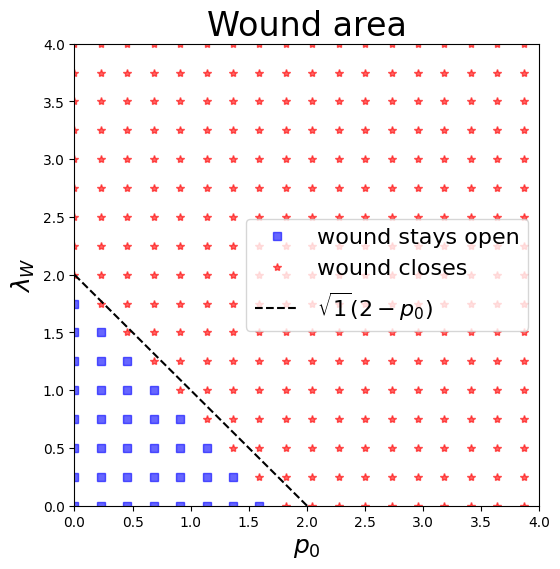

In [6]:
plt.figure(figsize=(6,6))

for i in range(len(L1_list)*len(LW1_list)):
    if a1_array[i,2]>0.38:
        if i == 0:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'bs',alpha=0.6,label = "wound stays open")
        else:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'bs',alpha=0.6)
    if a1_array[i,2]<0.38:
        if i == len(L1_list)*len(LW1_list)-1:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'r*',alpha=0.6,label = "wound closes")
        else:
            plt.plot(a1_array[i,0]/(0.55*2),a1_array[i,1],'r*',alpha=0.6)


beta1_lin = np.array(L1_list) 
lambda1_lin = np.array(LW1_list)

x1_fit = np.arange(0,43)/10/(0.38*2)
y1_fit = np.sqrt(1)*(2-x1_fit)
plt.plot(x1_fit,y1_fit,'k--',label="$\sqrt{1}(2 - p_0)$")

beta_fit = np.array([2.5, 2,1,0]).reshape((-1,1))/(0.55*2)
lambda_fit = np.array([0,0.5,1.5,2.5])

#plt.plot(beta_fit,lambda_fit,'k--',label="$(3.0 - \\beta)$")


plt.xlabel("$p_0$",fontsize = 18)
plt.ylabel("$\lambda_W$",fontsize = 18)
plt.title("Wound area",fontsize=24)
plt.legend(fontsize=16)
plt.ylim(0,4)
plt.xlim(0,4)

In [7]:
theta1 = t_array1
opt1 = opt_array1
beta1=np.zeros((len(tissues_list),len(L1_list)))
lambda1 = np.zeros((len(tissues_list),len(LW1_list)))

for w in range(len(wound_sizes)):
    beta1[w] = beta1_lin/(float(a0_sizes[w])*2)
    
for w in range(len(wound_sizes)):
    lambda1[w] = lambda1_lin/(float(a0_sizes[w])**(3/2))



In [8]:
def bin_xyzbig(x_vec,y_vec,z_array,n_bins,wound_l):
    
    min_x = np.ma.min(x_vec)
    max_x = np.ma.max(x_vec)#int(np.sqrt(len(x_vec)))
        
        
    min_y = np.ma.min(y_vec)
    max_y = np.ma.max(y_vec)
        
    bin_sizex = (max_x - min_x)/n_bins
    bin_sizey = (max_y - min_y)/n_bins

    binsx = np.arange(min_x,max_x,bin_sizex)
    binsy = np.arange(min_y,max_y,bin_sizey)
    z_bin = np.zeros((wound_l,binsx.shape[0],binsy.shape[0]))
    
    for l in range(wound_l):
        for i in range(n_bins-1):
            bin_vecx = list(np.where((x_vec[l]>= binsx[i])== (x_vec[l] < binsx[i+1]))[0])
            for j in range(n_bins-1):
                bin_vecy = list(np.where((y_vec[l]>= binsy[j])== (y_vec[l] < binsy[j+1]))[0])
                #bin_vec = list(set(bin_vecx).intersection(bin_vecy))
                if (len(bin_vecx) < 1) or (len(bin_vecy) < 1):
                    z_bin[l,j,i] = 0
                else:
                    z_bin[l,j,i] = np.nanmedian(z_array[l,bin_vecx,:][:,bin_vecy])
    return z_bin,binsx,binsy


In [9]:
a_array0,betax,lambday = bin_xyzbig(beta1,lambda1,a1_array1,len(L1_list),len(wound_sizes))
t1_array0,betax,lambday = bin_xyzbig(beta1,lambda1,t1_array1,len(L1_list),len(wound_sizes))
t_array0,betax,lambday = bin_xyzbig(beta1,lambda1,t_array1,len(L1_list),len(wound_sizes))
for i in range(len(t_array0)):
    t_array0[i] = t_array0[i]*dt_list

In [10]:

opt_array0,betax,lambday = bin_xyzbig(beta1,lambda1,opt_array1,len(L1_list),len(wound_sizes))
#for i in range(len(dt_list)):
#    opt_array0[i] = opt_array0[i]*dt_list[i]

/tmp/ipykernel_586955/2002431507.py:19: RuntimeWarning: invalid value encountered in power
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_586955/2002431507.py:19: RuntimeWarning: invalid value encountered in sqrt
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit


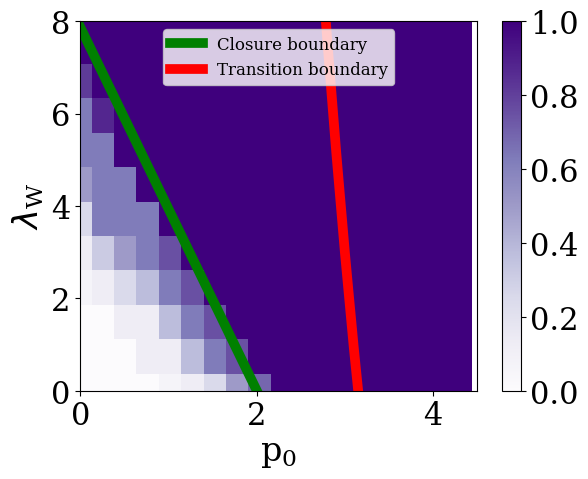

In [381]:
plt.pcolormesh(betax, lambday,1-np.mean(a_array0,axis=0),cmap='Purples',vmin = np.min(np.mean(a_array0,axis=0))-0.1,vmax = np.min(np.mean(a_array0,axis=0))+0.1)
plt.colorbar(ticks=np.arange(0,11,2)/10)
plt.clim(0,1)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
#plt.title(" Probability of closure",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$\lambda_\mathregular{W}$",fontsize = 24,fontdict= {'family':'serif'})
font1 = {'family' : 'serif',
        'size'   : 24}
rc('font', **font1)


x1_fit = np.arange(-10,40)/10
y1_fit = 3.93*(2.-x1_fit)
plt.plot(x1_fit,y1_fit,"green",label="Closure boundary",linewidth = 7)
betafit = 2.11/3.768*(x1_fit-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*x1_fit/3.768)
y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
plt.plot(x1_fit,y2_fit,"r-",label="Transition boundary",linewidth = 7)

plt.legend(fontsize=13,prop=font,loc = "upper center")
plt.ylim(0.0,8)
plt.xlim(0,4.5)
plt.show()

(3.0, 0.0)

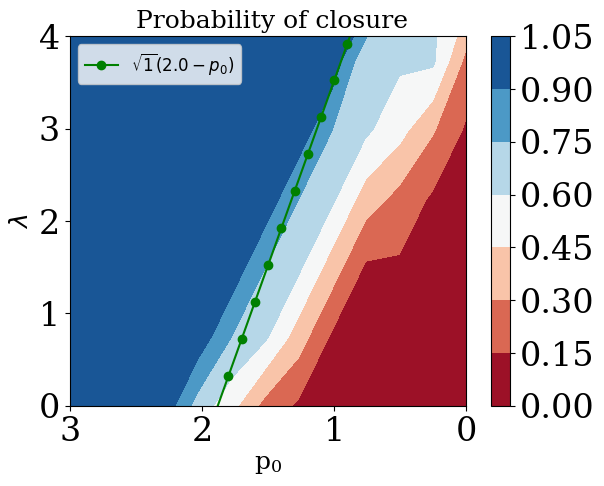

In [382]:
plt.contourf(betax, lambday,1-np.mean(a_array0,axis=0),cmap='RdBu')
plt.colorbar()
#plt.clim(0,1)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
plt.title(" Probability of closure",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 18,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 18,fontdict= {'family':'serif'})

x1_fit = np.arange(-10,40)/10
y1_fit = 4*(1.88-x1_fit)
plt.plot(x1_fit,y1_fit,'g-o',label="$\sqrt{1}(2.0- p_0)$")
plt.legend(fontsize=12,prop=font)
plt.ylim(0.0,4)
plt.xlim(3,0)

In [9]:
plt.plot(avg_t)

NameError: name 'avg_t' is not defined

# Closure times

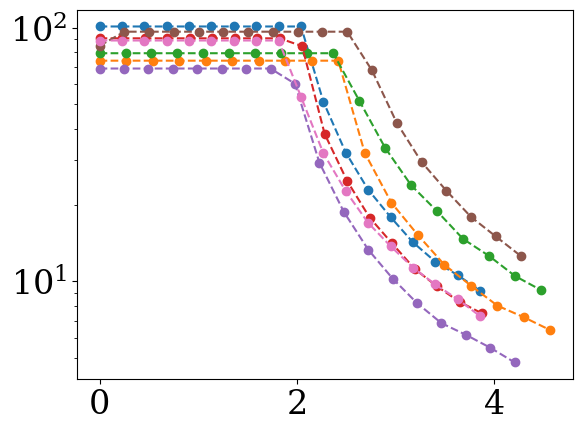

In [383]:
plt.plot(beta1[0,:],theta1[0,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[1,:],theta1[1,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[2,:],theta1[2,:,0],'o--',label="$1.983 A_0$")
#plt.plot(beta1[3,:],theta1[3,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[4,:],theta1[4,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[5,:],theta1[5,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[6,:],theta1[6,:,0],'o--',label="$1.983 A_0$")
plt.plot(beta1[7,:],theta1[7,:,0],'o--',label="$1.983 A_0$")
#plt.plot(beta1[8,:],theta1[8,:,0],'o--',label="$1.983 A_0$")

plt.yscale('log')
#plt.xscale('log')

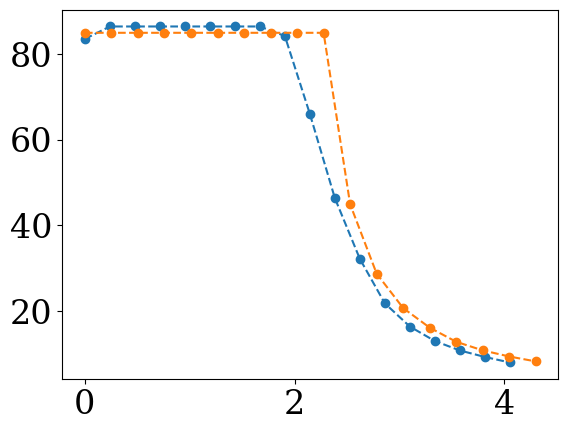

In [ ]:
plt.plot(np.mean(beta1[4:,:],axis=0),np.mean(theta1[4:,:,0],axis=0),'o--',label="$1.983 A_0$")
plt.plot(np.mean(beta1[:3,:],axis=0),np.mean(theta1[:3,:,0],axis=0),'o--',label="$1.983 A_0$")
#plt.plot(np.mean(beta1[:,:],axis=0),corrfact/np.mean(dt_list)*1/np.abs(np.mean(beta1[:,:],axis=0)-1.88))
#plt.yscale('log')

In [388]:
B,L = np.meshgrid(betax,lambday)

Z = np.log(2)/2*1.9/np.abs((L-4.22*(-B+1.88)))

gamma1 = 2.11
pc = 3.768
pw0 = 3.768 
corrfact = 1

Beta = gamma1*(B/pc-1)
LambdaW = L + gamma1*B
logterm = LambdaW/(Beta*pw0 + LambdaW)
abszeroterm = logterm>0
taufree = 1/(Beta)
Z1 = -corrfact*taufree*np.log(logterm*abszeroterm +0.01)
Z1 = Z1*(Z1>0)

/tmp/ipykernel_586955/3454237380.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(B,L,np.log10((Z1)/(2.11)),cmap='Blues')
/tmp/ipykernel_586955/3454237380.py:16: RuntimeWarning: invalid value encountered in power
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_586955/3454237380.py:16: RuntimeWarning: invalid value encountered in sqrt
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_586955/3454237380.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(betax, lambday,np.log10((np.mean(t_array0*((1-np.mean(a_array0,axis=0))==1),axis=0))),cmap='Blues')
/tmp/ipykernel_586955/3454237380.py:47: RuntimeWarning: invalid value encountered in power
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_586955/3454237

(0.0, 4.5)

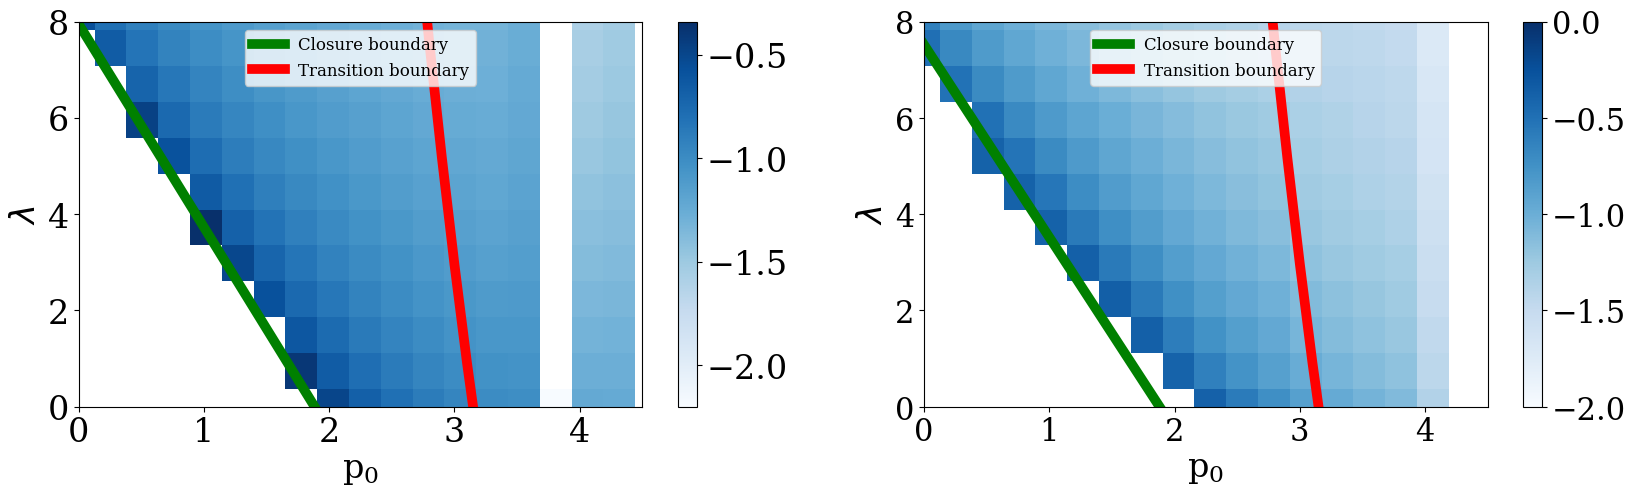

In [389]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.pcolormesh(B,L,np.log10((Z1)/(2.11)),cmap='Blues')
#plt.title(" Closure time ($\ln$($\\tau_{1/2}$))",fontsize = 18,fontfamily= 'serif')
plt.colorbar()
plt.clim(0,-2)
plt.ylim(0.0,8)
plt.xlim(0.0,4.5)

x1_fit = np.arange(-10,40)/10
y1_fit = 4.22*(1.884-x1_fit)
plt.plot(x1_fit,y1_fit,"g",label="Closure boundary",linewidth = 7)
betafit = 2.11/3.768*(x1_fit-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*x1_fit/3.768)
y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
plt.plot(x1_fit,y2_fit,"r",label="Transition boundary",linewidth = 7)

plt.legend(fontsize=12,prop=font,loc="upper center")
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 24,fontdict= {'family':'serif'})
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
font1 = {'family' : 'serif',
        'size'   : 22}
rc('font', **font1)

plt.subplot(122)
plt.pcolormesh(betax, lambday,np.log10((np.mean(t_array0*((1-np.mean(a_array0,axis=0))==1),axis=0))),cmap='Blues')
plt.colorbar()
plt.clim(-2,0)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
#plt.title(" Characteristic time ($\ln$|$\\tau_{1/2}$|)",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 24,fontdict= {'family':'serif'})

font1 = {'family' : 'serif',
        'size'   : 24}
rc('font', **font1)

x1_fit = np.arange(-10,40)/10
y1_fit = 4*(1.88-x1_fit)
plt.plot(x1_fit,y1_fit,"g",label="Closure boundary",linewidth = 7)
betafit = 2.11/3.768*(x1_fit-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*x1_fit/3.768)
y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
plt.plot(x1_fit,y2_fit,"r",label="Transition boundary",linewidth = 7)

plt.legend(fontsize=12,prop=font,loc="upper center")

plt.ylim(0.0,8)
plt.xlim(0.0,4.5)

Text(0, 0.5, 'Simulation')

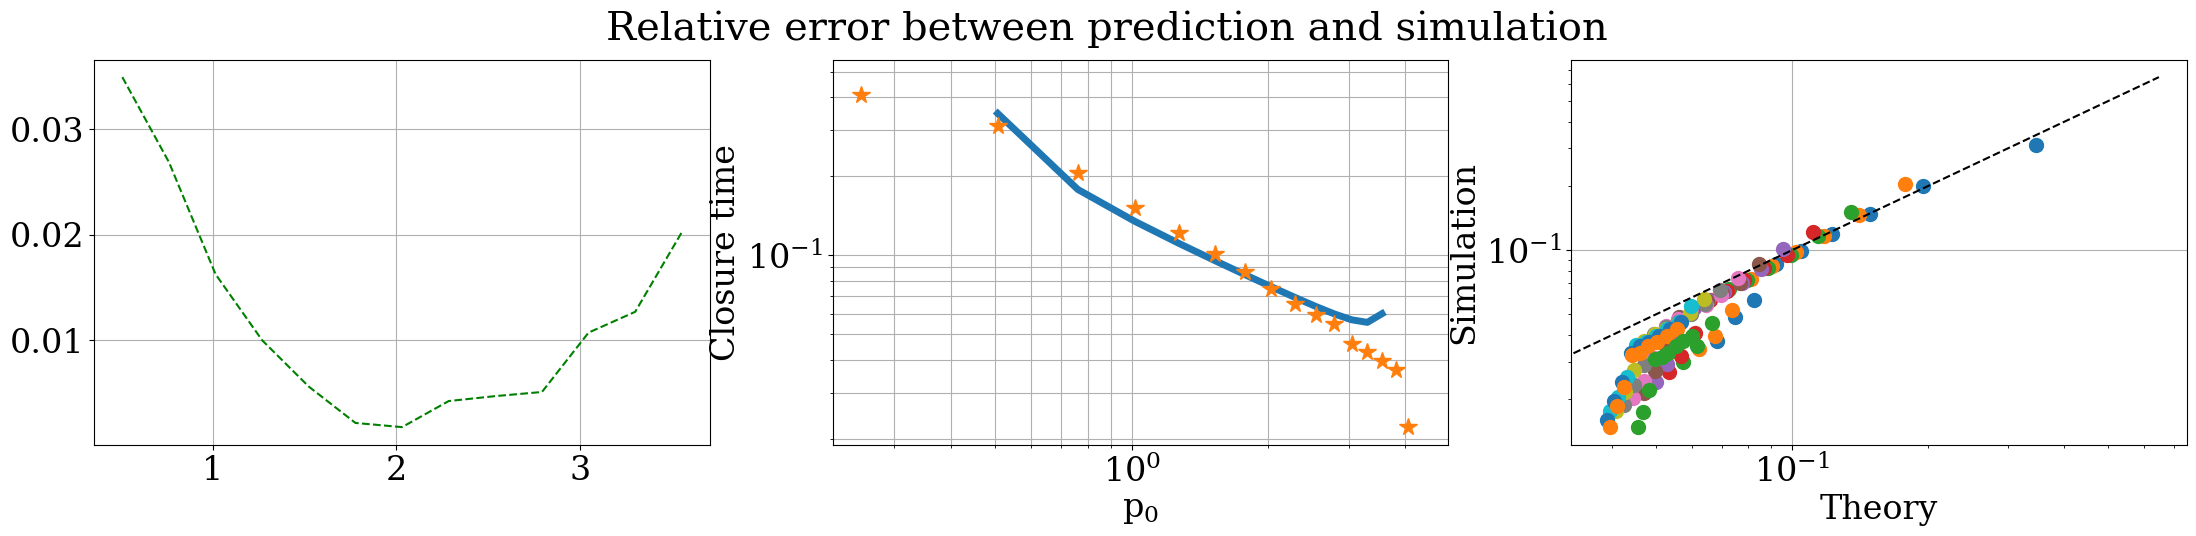

In [391]:
relerror = (np.abs((Z1/2.11)-np.mean(t_array0,axis=0)))
indexl = 8
plt.figure(figsize=(27,5))
plt.suptitle("Relative error between prediction and simulation")
plt.subplot(131)
plt.plot(betax[2:-3],relerror[indexl,2:-3],'g--')
plt.grid(which="both")
#plt.pcolormesh(B,L,relerror)
#plt.colorbar()
#plt.clim(-1,0)
#plt.ylim(0.0,8)
#plt.xlim(0.0,4.5)
plt.subplot(132)
plt.plot(betax[2:-3],Z1[indexl,2:-3]/2.11,'-',lw=5)
plt.plot(betax,np.mean(t_array0,axis=0)[indexl],'*',ms=13)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.xlabel("$\mathregular{p_0}$")
plt.ylabel("Closure time")

plt.subplot(133)
plt.plot(Z1[indexl:,2:-3]/2.11,np.mean(t_array0,axis=0)[indexl:,2:-3],'o',ms=10)
plt.plot(betax/4*0.6,betax/4*0.6,'k--')
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel("Theory")
plt.ylabel("Simulation")

# Opening Time

/tmp/ipykernel_30663/198443571.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(betax, lambday,np.log10((np.mean(opt_array0,axis=0)*(np.mean(opt_array0,axis=0)<0.4))),cmap='Blues')
/tmp/ipykernel_30663/198443571.py:19: RuntimeWarning: invalid value encountered in power
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_30663/198443571.py:19: RuntimeWarning: invalid value encountered in sqrt
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit


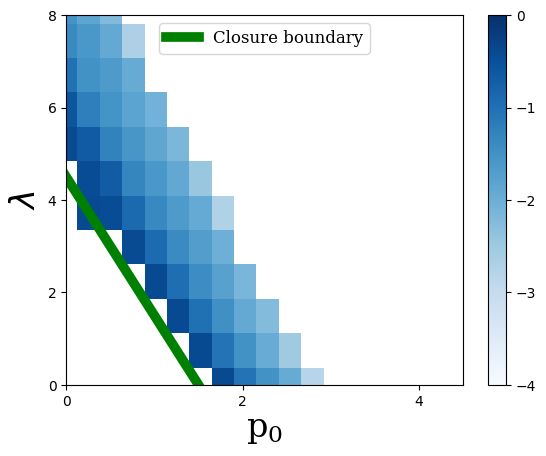

In [11]:
plt.pcolormesh(betax, lambday,np.log10((np.mean(opt_array0,axis=0)*(np.mean(opt_array0,axis=0)<0.4))),cmap='Blues')
plt.colorbar()
plt.clim(-4,0)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
#plt.title(" Characteristic time ($\ln$|$\\tau_{1/2}$|)",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 24,fontdict= {'family':'serif'})

font1 = {'family' : 'serif',
        'size'   : 24}
rc('font', **font1)

x1_fit = np.arange(-10,40)/10
y1_fit = 3.*(1.5-x1_fit)
plt.plot(x1_fit,y1_fit,"g",label="Closure boundary",linewidth = 7)
betafit = 2.11/3.768*(x1_fit-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*x1_fit/3.768)
y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
#plt.plot(x1_fit,y2_fit,"r-",label="Transition boundary",linewidth = 7)

plt.legend(fontsize=12,prop=font,loc="upper center")
plt.ylim(0.0,8)
plt.xlim(0,4.5)
plt.show()

In [40]:
def bound_func(bt,lb):
    lc = 3*(1.5-bt)
    if lb > lc:
        return 1
    else:
        return 0
    
def bif_func(bt,lb):
    if bt <= 3:
        return 1
    else:
        return 0


opt_max = (np.mean(opt_array0,axis=0))#*(np.mean(opt_array0,axis=0)<0.4))
list_1 = 0
list_12 = 0
list_2 = 0
list_22 = 0
list_3 = 0
list_32 = 0

list_23 = 0
list_13 = 0
list_33 = 0

mat_l1 = np.zeros(np.median(opt_array0,axis=0).shape)

for ix in range(len(betax)):
    for iy in range(len(lambday)):
        if bound_func(betax[ix],lambday[iy]) == 0:
            list_1 += opt_max[iy,ix]
            list_13 += np.std(opt_array0,axis=0)[iy,ix]
            list_12 += 1
            
        if bif_func(betax[ix],lambday[iy]) == 0:
            list_3 += opt_max[iy,ix]
            list_33 += np.std(opt_array0,axis=0)[iy,ix]
            list_32 += 1
            
        if (bound_func(betax[ix],lambday[iy]) == 1) and (bif_func(betax[ix],lambday[iy]) == 1):
            list_2 += opt_max[iy,ix]
            list_23 += np.std(opt_array0,axis=0)[iy,ix]
            list_22 += 1
            mat_l1[iy,ix] = 1
            

(0.001, 1)

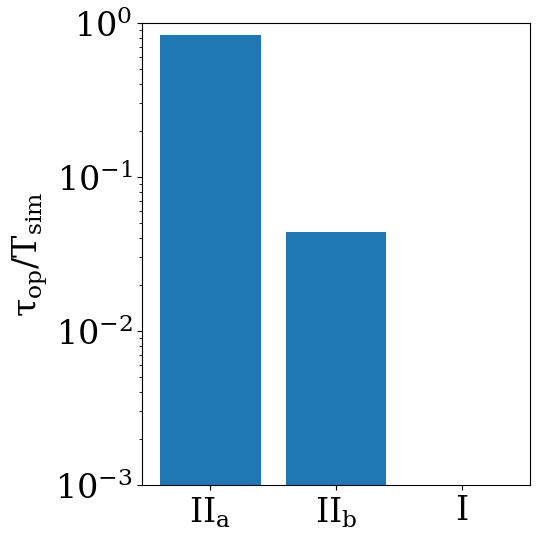

In [41]:
plt.figure(figsize=(5,6))
labels = ['$\mathregular{II_a}$', '$\mathregular{II_b}$', 'I']
counts = [list_1/list_12,list_2/list_22,list_3/list_32]
errors = [0.3*list_13/list_12,0.3*list_23/list_22,0.3*list_33/list_32]
plt.bar(labels, counts)
plt.yscale("log")
plt.ylabel("$\mathregular{\\tau_{op}}$/$\mathregular{T_{sim}}$")
plt.ylim(0.001,1)

In [39]:
errors

[0.0, 0.0, 0.0]

/tmp/ipykernel_30663/1166278093.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(betax, lambday,np.log10((np.mean(opt_array0,axis=0)*(np.mean(opt_array0,axis=0)<0.4))),cmap='Blues')


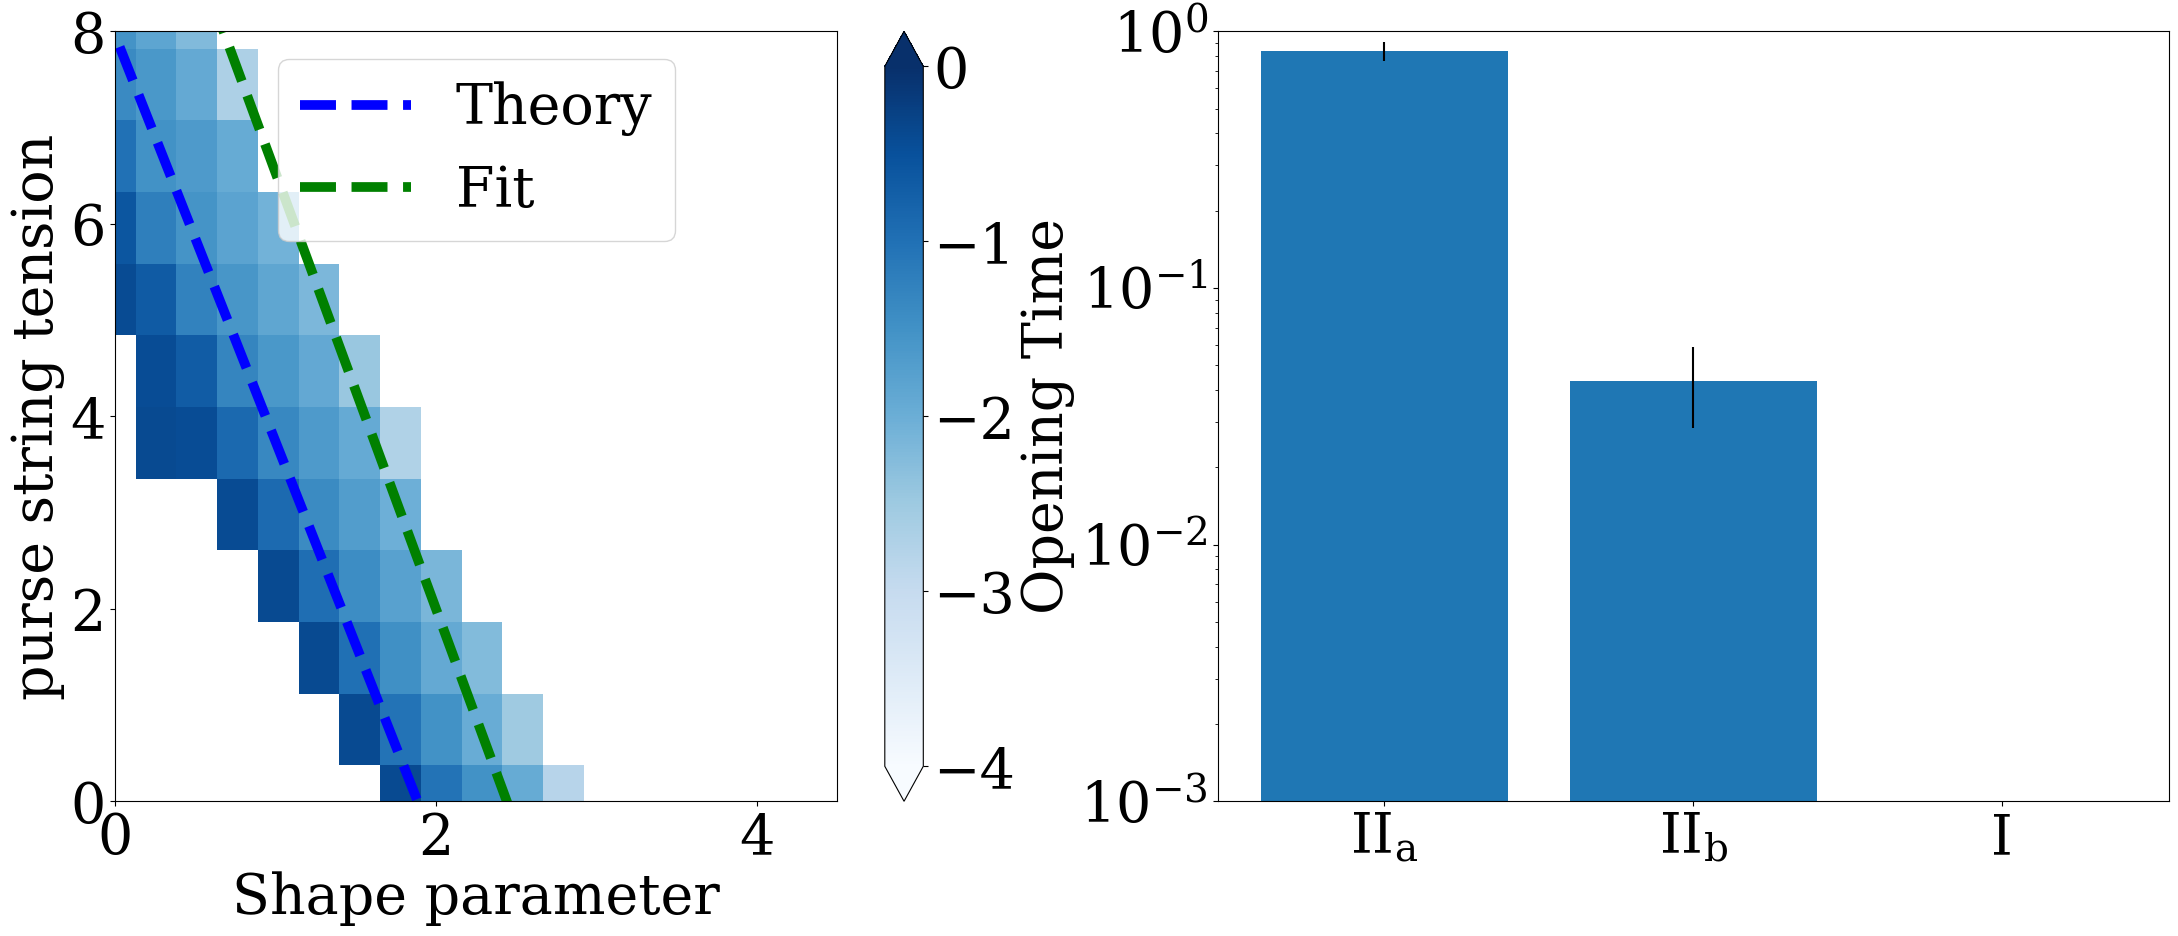

In [50]:
plt.figure(figsize=(27,10))
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=40)
font1 = {'family' : 'serif',
        'size'   : 40}
rc('font', **font1)

plt.subplot(121)
plt.pcolormesh(betax, lambday,np.log10((np.mean(opt_array0,axis=0)*(np.mean(opt_array0,axis=0)<0.4))),cmap='Blues')
plt.colorbar(extend='both',ticks = [0,-1,-2,-3,-4])
plt.clim(-4,0)

#plt.title(" Characteristic time ($\ln$|$\\tau_{1/2}$|)",fontsize = 18,fontfamily= 'serif')
plt.xlabel("Shape parameter")
plt.ylabel("purse string tension")



x1_fit = np.arange(-10,40)/10
y1_fit = 4.22*(1.884-x1_fit)
y2_fit = 4.53*(2.44-x1_fit)
plt.plot(x1_fit,y1_fit,"b--",label="Theory",linewidth = 7)
plt.plot(x1_fit,y2_fit,"g--",label="Fit",linewidth = 7)

#plt.plot(x1_fit,y2_fit,"r-",label="Transition boundary",linewidth = 7)

plt.legend(prop=font,loc="upper center")
plt.ylim(0.0,8)
plt.xlim(0,4.5)
plt.gca().set_aspect(0.6)

#plt.title("Half-closure time")
plt.subplot(122)
labels = ['$\mathregular{II_a}$', '$\mathregular{II_b}$', 'I']
counts = [list_1/list_12,list_2/list_22,list_3/list_32]
errors = [0.3*list_13/list_12,0.3*list_23/list_22,0.3*list_33/list_32]
plt.bar(labels, counts,yerr = errors)
plt.yscale("log")
plt.ylabel("Opening Time")
plt.ylim(0.001,1)

plt.savefig("RecoilPython.pdf", dpi = 600,bbox_inches='tight')

In [158]:
B,L = np.meshgrid(betax,lambday)

Z = np.log(2)/2*1.9/np.abs((L-4.22*(-B+1.88)))

gamma1 = 2.11
pc = 3.768
pw0 = 3.768 
corrfact = np.log(2)/2

Beta = gamma1*(B/pc-1)
LambdaW = L + gamma1*B
logterm = LambdaW/(Beta*pw0 + LambdaW)
abszeroterm = logterm>0
taufree = 1/(Beta)
Z1 = -corrfact*taufree*np.log(logterm*abszeroterm +0.01)

# Rearrangement Rates

/tmp/ipykernel_586955/462849334.py:2: RuntimeWarning: invalid value encountered in divide
  plt.pcolormesh(betax, lambday,np.log10(np.median(t1_array0,axis=0)/np.mean(t_array0,axis=0)),cmap='Blues')
/tmp/ipykernel_586955/462849334.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(betax, lambday,np.log10(np.median(t1_array0,axis=0)/np.mean(t_array0,axis=0)),cmap='Blues')


(0.0, 4.5)

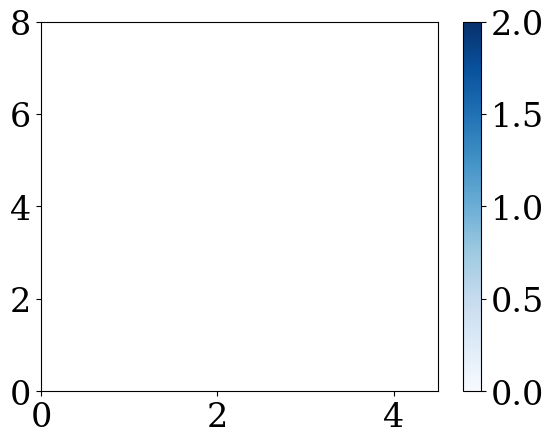

In [ ]:
#plt.plot(lambday[:-1],np.diff(1-np.mean(a_array0[:,0],axis=0)))
plt.pcolormesh(betax, lambday,np.log10(np.median(t1_array0,axis=0)/np.mean(t_array0,axis=0)),cmap='Blues')
plt.colorbar()
plt.clim(0,2)
plt.ylim(0.0,8)
plt.xlim(0.0,4.5)

#plt.plot(betax,,'o--')
#plt.plot(betax,np.log10(np.mean(t1_array0,axis=0)+1)[4],'o--')
#plt.plot(betax,np.log10(np.mean(t1_array0,axis=0)+1)[9],'o--')

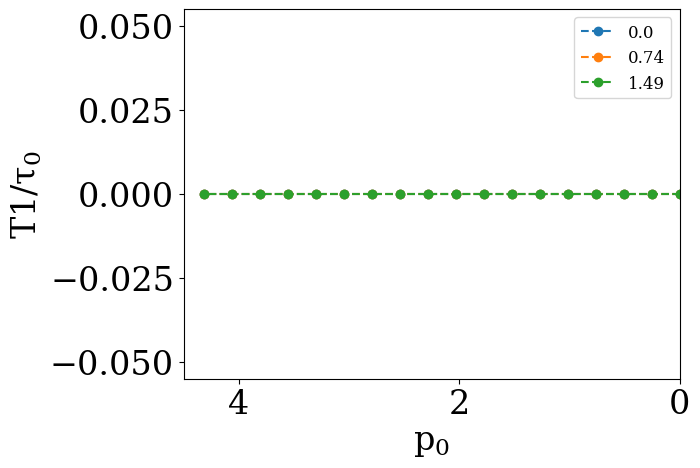

In [ ]:
#plt.plot(betax,np.mean(np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0),axis=0),'--o')
plt.plot(betax,np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[0],'--o',label = lambday[0].round(2))
plt.plot(betax,np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[1],'--o',label = lambday[1].round(2))
plt.plot(betax,np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[2],'--o',label = lambday[2].round(2))
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("T1/$\mathregular{\\tau_0}$")
plt.xlim(4.5,0)
plt.legend(fontsize=13,prop=font,loc = "best")
#plt.plot(betax,np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[0],'--o')
#plt.plot(betax,(np.median(t1_array0,axis=0)/np.mean(t_array0,axis=0))[9],'--o')
#plt.plot(betax,(np.median(t1_array0,axis=0))[12],'--o')

/tmp/ipykernel_586955/276607906.py:19: RuntimeWarning: invalid value encountered in power
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
/tmp/ipykernel_586955/276607906.py:19: RuntimeWarning: invalid value encountered in sqrt
  y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit


(0.0, 4.5)

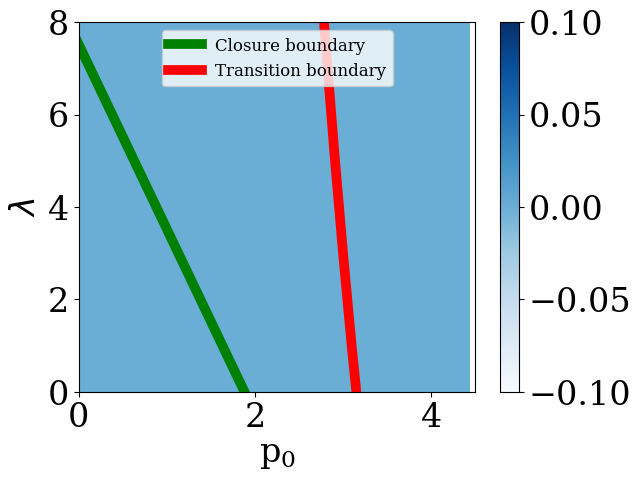

In [ ]:
plt.pcolormesh(betax, lambday,np.log10(np.mean(t1_array0/(t_array0+np.mean(dt_list)),axis=0)+1),cmap='Blues')
plt.colorbar()
#plt.clim(10,100)
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
#plt.title(" Rearrangements ($\log_{10}$)",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{p_0}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$\lambda$",fontsize = 24,fontdict= {'family':'serif'})

font1 = {'family' : 'serif',
        'size'   : 24}
rc('font', **font1)

x1_fit = np.arange(-10,40)/10
y1_fit = 4*(1.88-x1_fit)
plt.plot(x1_fit,y1_fit,"green",label="Closure boundary",linewidth = 7)
betafit = 2.11/3.768*(x1_fit-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*x1_fit/3.768)
y2_fit = 5/9*((alphafit*0.47/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit)) -betafit*6/9-2.11*x1_fit
plt.plot(x1_fit,y2_fit,"r",label="Transition boundary",linewidth = 7)

plt.legend(fontsize=20,prop=font,loc="upper center")

plt.ylim(0.0,8)
plt.xlim(0.0,4.5)

In [ ]:
def bound_func(bt,lb):
    lc = 4*(1.86-bt)
    if lb > lc:
        return 1
    else:
        return 0
    
def bif_func(bt,lb):
    if bt <= 3:
        return 1
    else:
        return 0
    

list_1 = 0
list_12 = 0
list_2 = 0
list_22 = 0
list_3 = 0
list_32 = 0

list_23 = 0
list_13 = 0
list_33 = 0

mat_l1 = np.zeros(np.median(t1_array0,axis=0).shape)

for ix in range(len(betax)):
    for iy in range(len(lambday)):
        if bound_func(betax[ix],lambday[iy]) == 0:
            list_1 += np.median(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_13 += np.std(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_12 += 1
            
        if bif_func(betax[ix],lambday[iy]) == 0:
            list_3 += np.median(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_33 += np.std(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_32 += 1
            
        if (bound_func(betax[ix],lambday[iy]) == 1) and (bif_func(betax[ix],lambday[iy]) == 1):
            list_2 += np.median(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_23 += np.std(t1_array0/(t_array0+np.mean(dt_list)),axis=0)[iy,ix]
            list_22 += 1
            mat_l1[iy,ix] = 1
            

In [ ]:
[list_13/list_12,list_23/list_22,list_33/list_32]

[0.0, 0.0, 0.0]

(0.0, 20.0)

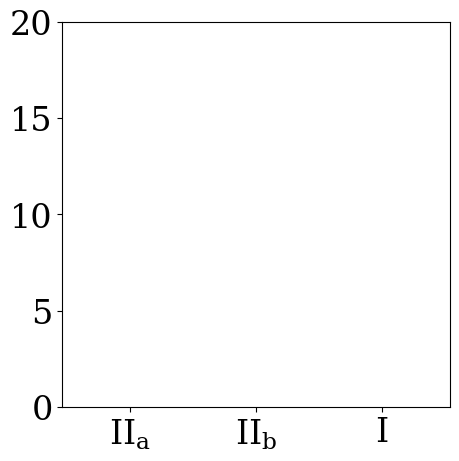

In [ ]:
plt.figure(figsize=(5,5))
labels = ['$\mathregular{II_a}$', '$\mathregular{II_b}$', 'I']
counts = [list_1/list_12,list_2/list_22,list_3/list_32]
errors = [0.3*list_13/list_12,0.3*list_23/list_22,0.3*list_33/list_32]
plt.bar(labels, counts,yerr = errors)
plt.ylim(0,20)